In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [3]:
from src import config, sampling_utils, data

In [4]:
default_cfg = config.SpriteWorldConfig()

In [5]:
default_cfg

SpriteWorldConfig(x=Range(min=0.2, max=0.8), y=Range(min=0.2, max=0.8), shape=['triangle', 'square', 'circle'], scale=Range(min=0.1, max=0.5), angle=Range(min=0, max=360), c0=Range(min=0.1, max=0.9), c1=Range(min=0.1, max=0.9), c2=Range(min=0.1, max=0.9))

In [6]:
def plot_random_dataset_images(dataset, rows=2, cols=3):
    """Showing random images from the dataset."""
    fig, ax = plt.subplots(rows, cols,
                           sharex='col', 
                           sharey='row')
    
    for row in range(rows):
        for col in range(cols):
            ax[row, col].imshow(dataset[np.random.choice(range(len(dataset)))][0])
    plt.tight_layout()

    plt.show()


In [7]:
def plot_latents_scatter(dataset):
    """Scatter plot for latents to check whete sampling works correctly."""
    df = pd.DataFrame(dataset[:][1].reshape(-1, 8), columns=list(default_cfg.get_latents_metadata().keys()))     
    
    sns.pairplot(df, hue="shape", diag_kind="hist", corner=True, palette="tab10")


In [8]:
def plot_slots_scatter(dataset, n_slots, delta):
    slot_i, slot_j = np.random.choice(range(n_slots), size=[2], replace=False)
    metadata = dataset.cfg.get_latents_metadata()
    fig, ax = plt.subplots(1, dataset.cfg.get_total_latent_dim,
                           figsize=(15, 2))
    fig.suptitle(f"delta={delta}")
    fig.tight_layout()
    for i, latent in enumerate(metadata):
        ax[i].scatter(dataset[:][1][:, slot_i, i], dataset[:][1][:, slot_j, i])
        ax[i].set_xlabel(f"slot-{slot_i} latent-{latent}")
        ax[i].set_ylabel(f"slot-{slot_j} latent-{latent}")

    plt.show()

## Random Sampling

In [9]:
n_samples = 100
n_slots = 2
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="random")

C:\Python310\lib\site-packages\spriteworld\sprite.py:84: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  self._position = np.array([x, y])
C:\Python310\lib\site-packages\spriteworld\sprite.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._position = np.array([x, y])
C:\Python310\lib\site-packages\spriteworld\renderers\color_maps.py:28: FutureWarning: The inpu

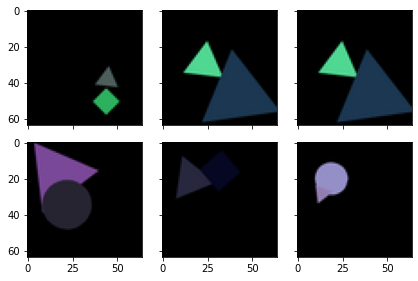

In [17]:
plot_random_dataset_images(random_dataset)

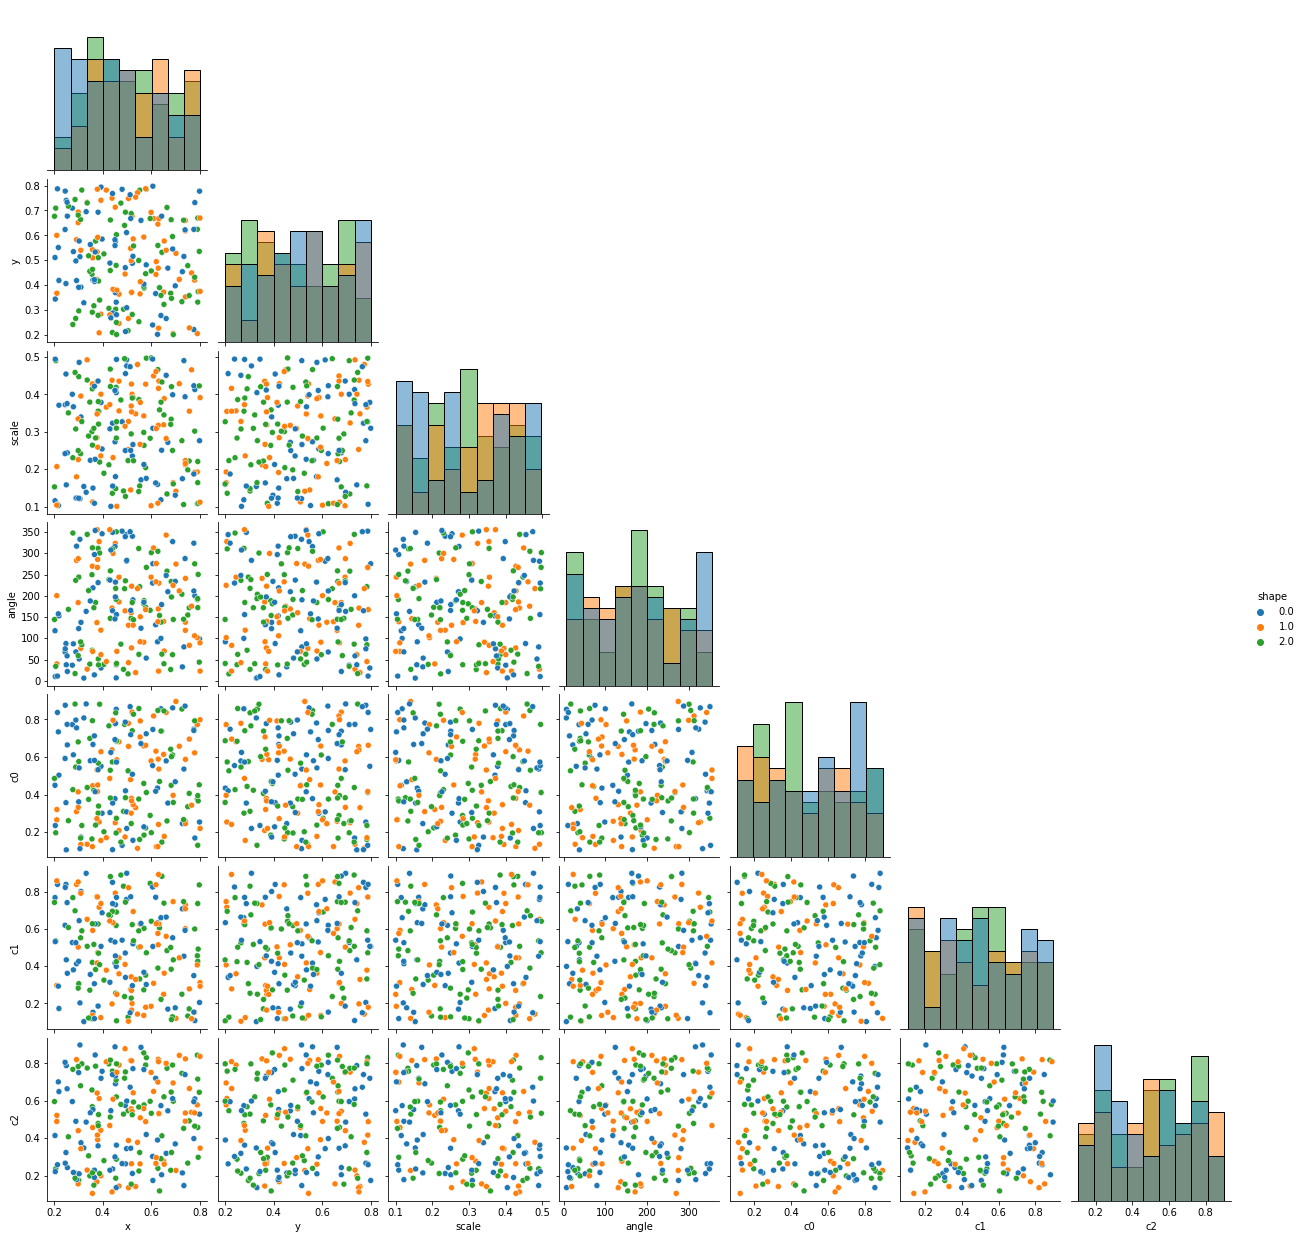

In [11]:
plot_latents_scatter(random_dataset)

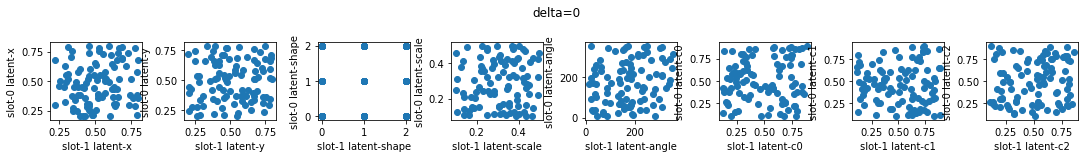

In [12]:
plot_slots_scatter(random_dataset, n_slots, 0)

## Diagonal sampling

In [22]:
n_slots = 2
n_samples = 1000
delta = 1
diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="diagonal", delta=delta)

C:\Python310\lib\site-packages\spriteworld\sprite.py:84: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  self._position = np.array([x, y])
C:\Python310\lib\site-packages\spriteworld\sprite.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._position = np.array([x, y])
C:\Python310\lib\site-packages\spriteworld\renderers\color_maps.py:28: FutureWarning: The inpu

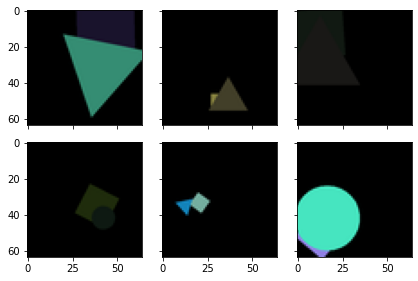

In [23]:
plot_random_dataset_images(diagonal_dataset)

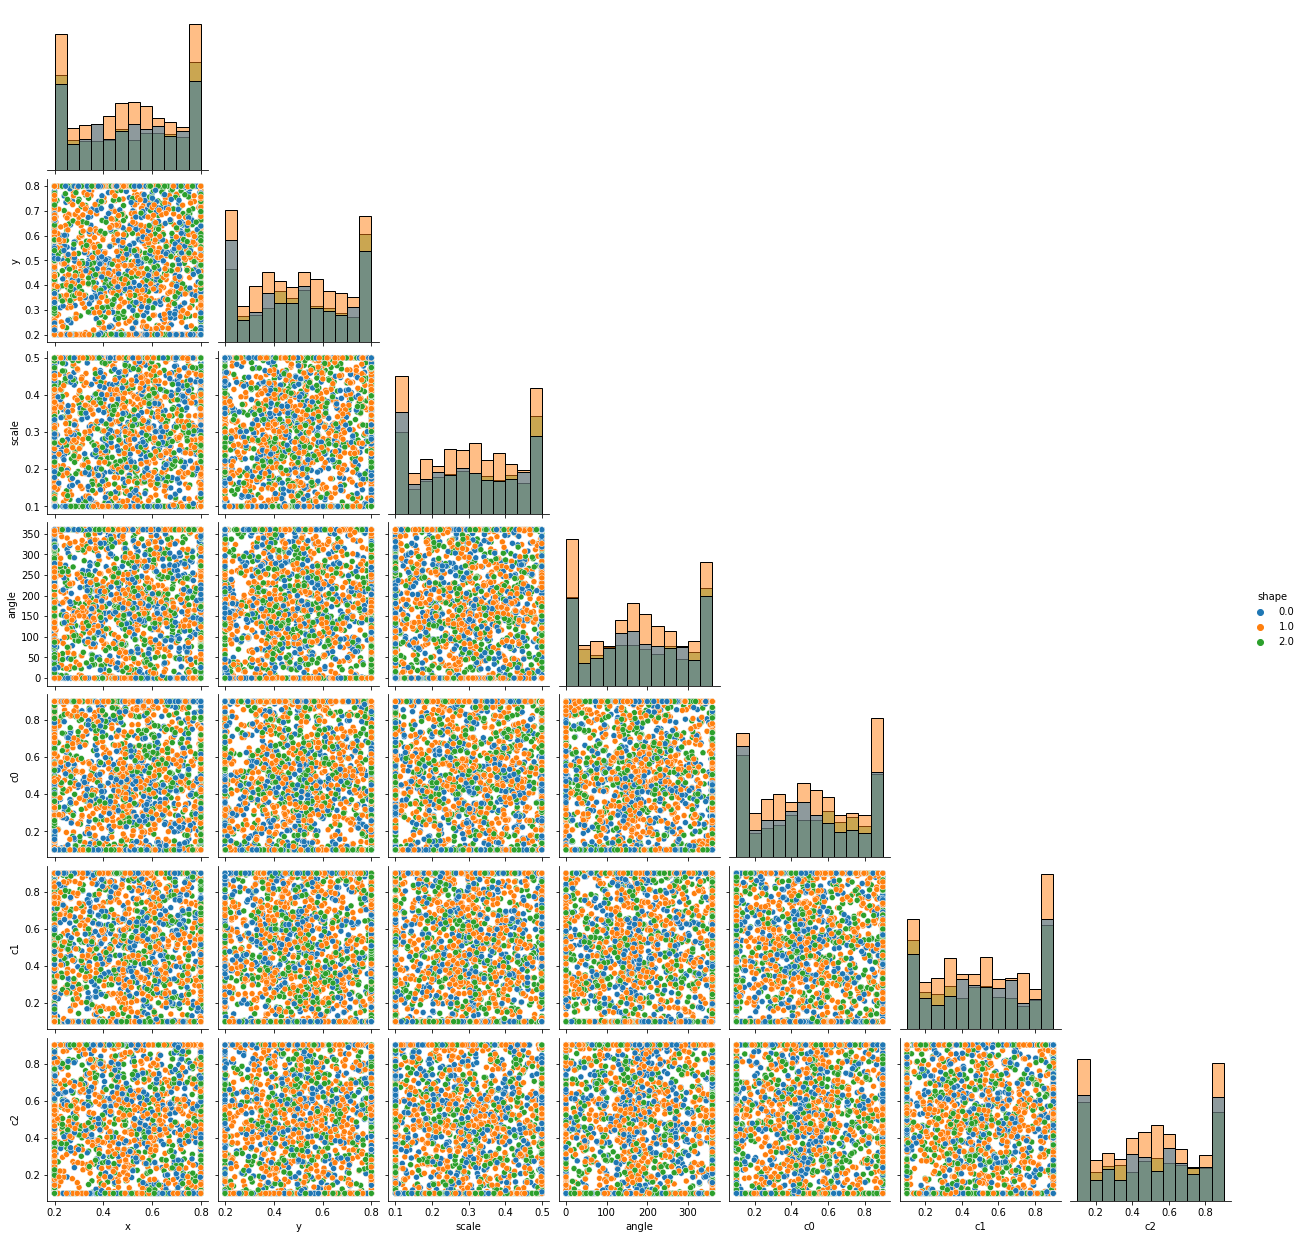

In [24]:
plot_latents_scatter(diagonal_dataset)

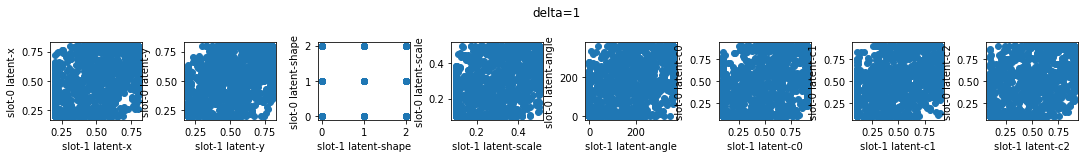

In [25]:
plot_slots_scatter(diagonal_dataset, n_slots, delta)